# Plotly Sankey Diagrams and parallel categories with Dimensions data

* https://plotly.com/python-api-reference/generated/plotly.express.parallel_categories.html#plotly.express.parallel_categories
* https://plotly.com/python/sankey-diagram/

In [14]:
import os
import sys
import time
import json
import pandas as pd
from pandas import json_normalize
from tqdm.notebook import tqdm as progress
import plotly.express as px
from plotly.offline import plot
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports 
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)
#
import dimcli
from dimcli.shortcuts import *
#
dimcli.login()
dsl = dimcli.Dsl()

DimCli v0.6.2.2 - Succesfully connected to <https://app.dimensions.ai> (method: dsl.ini file)


### Testing out plotly_express with DSL data

In [10]:
res = dslquery("""search publications for "malaria" 
                where research_org_country_names="Italy" and times_cited > 100
                return publications[id+doi+journal+title+type+year+times_cited] limit 1000""")

Returned Publications: 485 (total = 485)


In [11]:
df = res.as_dataframe()

In [12]:
df.head(5)

,doi,id,journal.id,journal.title,times_cited,title,type,year
0,10.1016/s0140-6736(18)31788-4,pub.1111456997,jour.1077219,The Lancet,385,Food in the Anthropocene: the EAT–Lancet Commi...,article,2019
1,10.1001/jamaoncol.2018.2706,pub.1104369622,jour.1051466,JAMA Oncology,267,"Global, Regional, and National Cancer Incidenc...",article,2018
2,10.1016/s1473-3099(17)30753-3,pub.1099909850,jour.1030033,The Lancet Infectious Diseases,417,"Discovery, research, and development of new an...",article,2018
3,10.1002/14651858.cd007498.pub3,pub.1092191486,jour.1022148,Cochrane Database of Systematic Reviews,104,Procalcitonin to initiate or discontinue antib...,article,2017
4,10.1002/eji.201646632,pub.1092164786,jour.1054998,European Journal of Immunology,225,Guidelines for the use of flow cytometry and c...,article,2017


### Parallel categories: if a category has too many values it simply isn't displayed

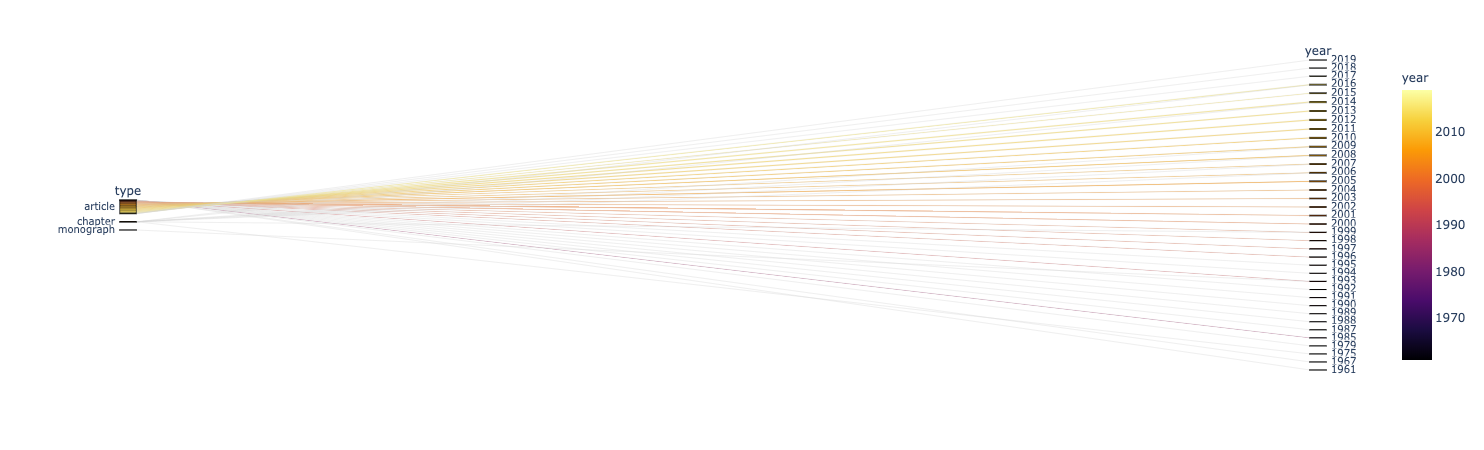

In [15]:
px.parallel_categories(df[['journal.title', 'type', 'year']], 
                       color="year", 
                       color_continuous_scale=px.colors.sequential.Inferno)

### Reducing the df to 20 rows does the job.. (so that journal.title has less values)

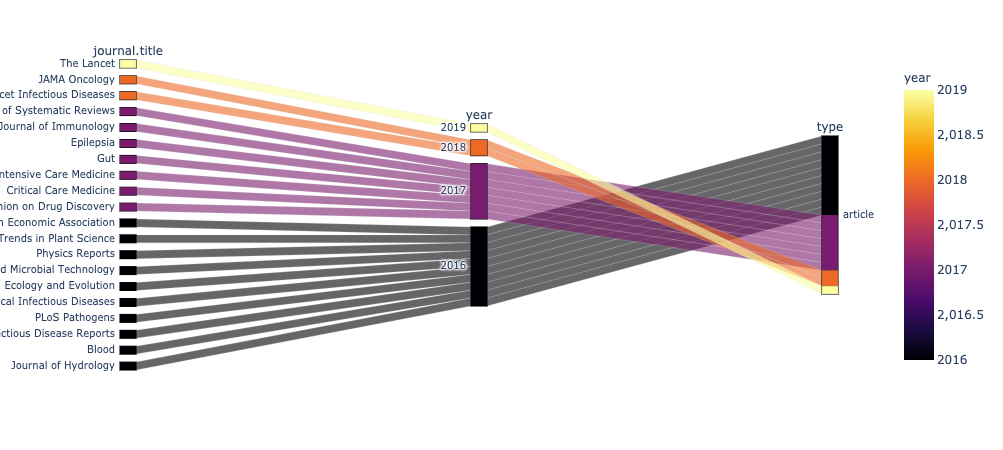

In [17]:
px.parallel_categories(df[['journal.title', 'year', 'type']][:20], 
                       color="year", 
                       color_continuous_scale=px.colors.sequential.Inferno)

### Better results if we take only categories that appear more than once!

In [19]:
df_top_journals = df.groupby('journal.title').filter(lambda x: len(x) > 3)

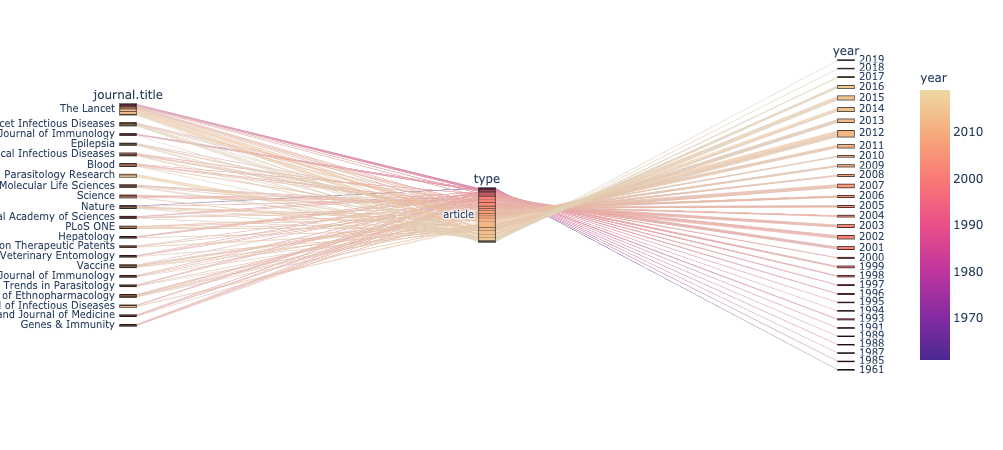

In [20]:
px.parallel_categories(df_top_journals[['journal.title', 'type', 'year']], 
                       color="year", 
                       color_continuous_scale=px.colors.sequential.Agsunset)